In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import catboost as cb

pd.set_option("max_columns", 999)
pd.set_option("max_rows", 999)

# 모델설정
sm = SMOTE(ratio='auto', kind='regular')

In [185]:
final = pd.read_csv('data_network_alpha.csv', index_col = 'actor_account')
perday = pd.read_csv('data_perday_alpha.csv', index_col = 'actor_account')
final = pd.merge(final, perday, how='inner',  on = "actor_account")
model_data = final.copy()

In [186]:
final.head()

,trade_go,trade_come,sell_to_shop,sell_to_person,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,login_total_day_x,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,login_total_day_y,sit_count_perday,login_total_day.1,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count,class
actor_account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000005,2,4,196,6,1,21,7,58,0,0,0,15,0.133333,4.800000,13.066667,1.400000,0.466667,3.866667,0.000000,259,637926,0,42528.40000,0,270,389149580,4686,376,47,30,51,15,18.000000,15,2076.600000,312.400000,0.000000,25.066667,8862,0.000423,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129030,0
20000016,1,0,111,1,0,56,16,35,0,0,0,14,0.071429,2.428571,7.928571,4.000000,1.142857,2.500000,0.000000,38,401885,42,28706.07143,0,153,80119427,1596,343,32,75,75,14,10.928571,14,4398.500000,114.000000,0.000000,24.500000,69458,0.000381,0.000080,0.000187,0.172831,0.000853,10575.921050,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013,0
20000033,12,9,338,0,2,3,5,46,1,4,2,14,0.857143,2.214286,24.142857,0.214286,0.357143,3.285714,0.071429,43,240334,38,17166.71429,0,378,142485377,1318,337,35,53,69,14,27.000000,14,1763.285714,94.142857,0.000000,24.071429,43619,0.001573,0.000146,0.000221,0.181493,0.001402,5589.162791,592.864002,1226.193878,0.883721,1.604651,9.947368,2477.670103,0
20000035,111,37,504,0,0,0,0,0,0,0,0,15,7.400000,0.733333,33.600000,0.000000,0.000000,0.000000,0.000000,25,1205493,0,80366.20000,0,207,1377552887,7979,44,0,12,10,15,13.800000,15,7319.666667,531.933333,0.000000,2.933333,0,0.000172,0.000000,0.000010,0.000000,0.000036,48219.720000,1142.729893,5357.746667,0.000000,0.400000,0.000000,0.000000,0
20000051,74,57,254,0,21,35,85,98,25,0,0,15,4.933333,4.533333,16.933333,2.333333,5.666667,6.533333,1.666667,110,457433,0,30495.53333,0,320,395099069,3551,568,311,109,261,15,21.333333,15,6557.866667,236.733333,0.066667,37.866667,40934,0.000700,0.000680,0.000238,0.089486,0.001242,4158.481818,863.731014,2033.035555,0.000000,2.372727,0.000000,5717.912500,0


In [188]:
model_data.head()

,trade_go,trade_come,sell_to_shop,sell_to_person,mail_go,mail_come,invite,join,fight,friend_num,friend_num_change_count,login_total_day_x,trade_go_perday,buy_from_shop_perday,sell_to_shop_perday,mail_come_perday,invite_perday,join_perday,fight_perday,login_count,play_time,max_level,playtime_per_day,abyss,sit_count,exp_get_amout,money_get_count,teleport_count,killed_by_pc,killed_by_npc,reborn_count,login_total_day_y,sit_count_perday,login_total_day.1,item_get_count_perday,money_get_count_perday,use_portal_count_perday,teleport_count_perday,total_party_time,sit_count/play_time,killed_by_pc/play_time,killed_by_npc/play_time,total-party_time/play_time,teleport_count/play_time,play_time/login_count,exp_get_amount/play_time,playtime_per_day/login_total_day,max_level/login_count,reborn_count/login_count,sit_count/max_level,play_time/question_count,class
actor_account,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
20000005,2,4,196,6,1,21,7,58,0,0,0,15,0.133333,4.800000,13.066667,1.400000,0.466667,3.866667,0.000000,259,637926,0,42528.40000,0,270,389149580,4686,376,47,30,51,15,18.000000,15,2076.600000,312.400000,0.000000,25.066667,8862,0.000423,0.000074,0.000047,0.013892,0.000589,2463.034749,610.023075,2835.226667,0.000000,0.196911,0.000000,10289.129030,0
20000016,1,0,111,1,0,56,16,35,0,0,0,14,0.071429,2.428571,7.928571,4.000000,1.142857,2.500000,0.000000,38,401885,42,28706.07143,0,153,80119427,1596,343,32,75,75,14,10.928571,14,4398.500000,114.000000,0.000000,24.500000,69458,0.000381,0.000080,0.000187,0.172831,0.000853,10575.921050,199.359088,2050.433674,1.105263,1.973684,3.642857,68.197013,0
20000033,12,9,338,0,2,3,5,46,1,4,2,14,0.857143,2.214286,24.142857,0.214286,0.357143,3.285714,0.071429,43,240334,38,17166.71429,0,378,142485377,1318,337,35,53,69,14,27.000000,14,1763.285714,94.142857,0.000000,24.071429,43619,0.001573,0.000146,0.000221,0.181493,0.001402,5589.162791,592.864002,1226.193878,0.883721,1.604651,9.947368,2477.670103,0
20000035,111,37,504,0,0,0,0,0,0,0,0,15,7.400000,0.733333,33.600000,0.000000,0.000000,0.000000,0.000000,25,1205493,0,80366.20000,0,207,1377552887,7979,44,0,12,10,15,13.800000,15,7319.666667,531.933333,0.000000,2.933333,0,0.000172,0.000000,0.000010,0.000000,0.000036,48219.720000,1142.729893,5357.746667,0.000000,0.400000,0.000000,0.000000,0
20000051,74,57,254,0,21,35,85,98,25,0,0,15,4.933333,4.533333,16.933333,2.333333,5.666667,6.533333,1.666667,110,457433,0,30495.53333,0,320,395099069,3551,568,311,109,261,15,21.333333,15,6557.866667,236.733333,0.066667,37.866667,40934,0.000700,0.000680,0.000238,0.089486,0.001242,4158.481818,863.731014,2033.035555,0.000000,2.372727,0.000000,5717.912500,0


# Create Dataset

In [239]:
x = model_data.iloc[:, :-1]
y = model_data.iloc[:, -1]

In [329]:
print(list(y).count(0))
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

7500


# Basic CatBoost Test

In [330]:
cb_clf = cb.CatBoostClassifier(
                task_type='CPU',
                border_count=11,
                depth = 8,
                learning_rate = 0.028,
                iterations = 1050,
                thread_count = 4)

In [331]:
cb_clf.fit(x_train, y_train)

0:	learn: 0.6442386	total: 4.09ms	remaining: 4.29s
1:	learn: 0.5965008	total: 7.95ms	remaining: 4.17s
2:	learn: 0.5532530	total: 11.7ms	remaining: 4.1s
3:	learn: 0.5146767	total: 15.6ms	remaining: 4.09s
4:	learn: 0.4824482	total: 19.6ms	remaining: 4.1s
5:	learn: 0.4518850	total: 23.5ms	remaining: 4.09s
6:	learn: 0.4228861	total: 27.5ms	remaining: 4.1s
7:	learn: 0.3992205	total: 31.3ms	remaining: 4.08s
8:	learn: 0.3768145	total: 35ms	remaining: 4.05s
9:	learn: 0.3537543	total: 38.9ms	remaining: 4.04s
10:	learn: 0.3371087	total: 42.6ms	remaining: 4.03s
11:	learn: 0.3189817	total: 46.4ms	remaining: 4.01s
12:	learn: 0.3017016	total: 50.3ms	remaining: 4.01s
13:	learn: 0.2859075	total: 54.4ms	remaining: 4.02s
14:	learn: 0.2703376	total: 58.2ms	remaining: 4.02s
15:	learn: 0.2561111	total: 62.1ms	remaining: 4.01s
16:	learn: 0.2440235	total: 65.9ms	remaining: 4s
17:	learn: 0.2320875	total: 69.8ms	remaining: 4s
18:	learn: 0.2225653	total: 73.7ms	remaining: 4s
19:	learn: 0.2132190	total: 77.5ms	r

185:	learn: 0.0413605	total: 725ms	remaining: 3.37s
186:	learn: 0.0412017	total: 729ms	remaining: 3.37s
187:	learn: 0.0410493	total: 733ms	remaining: 3.36s
188:	learn: 0.0408760	total: 737ms	remaining: 3.36s
189:	learn: 0.0406635	total: 741ms	remaining: 3.35s
190:	learn: 0.0404749	total: 745ms	remaining: 3.35s
191:	learn: 0.0403481	total: 749ms	remaining: 3.35s
192:	learn: 0.0401227	total: 753ms	remaining: 3.34s
193:	learn: 0.0397997	total: 757ms	remaining: 3.34s
194:	learn: 0.0396625	total: 761ms	remaining: 3.34s
195:	learn: 0.0394389	total: 765ms	remaining: 3.33s
196:	learn: 0.0392100	total: 769ms	remaining: 3.33s
197:	learn: 0.0390298	total: 773ms	remaining: 3.33s
198:	learn: 0.0388509	total: 777ms	remaining: 3.32s
199:	learn: 0.0386363	total: 781ms	remaining: 3.32s
200:	learn: 0.0384032	total: 785ms	remaining: 3.31s
201:	learn: 0.0382570	total: 789ms	remaining: 3.31s
202:	learn: 0.0381857	total: 793ms	remaining: 3.31s
203:	learn: 0.0380617	total: 797ms	remaining: 3.3s
204:	learn: 0

362:	learn: 0.0212178	total: 1.44s	remaining: 2.73s
363:	learn: 0.0211608	total: 1.44s	remaining: 2.72s
364:	learn: 0.0210682	total: 1.45s	remaining: 2.72s
365:	learn: 0.0210112	total: 1.45s	remaining: 2.71s
366:	learn: 0.0209517	total: 1.46s	remaining: 2.71s
367:	learn: 0.0209323	total: 1.46s	remaining: 2.71s
368:	learn: 0.0208523	total: 1.46s	remaining: 2.7s
369:	learn: 0.0207266	total: 1.47s	remaining: 2.7s
370:	learn: 0.0206209	total: 1.47s	remaining: 2.69s
371:	learn: 0.0205252	total: 1.48s	remaining: 2.69s
372:	learn: 0.0204801	total: 1.48s	remaining: 2.69s
373:	learn: 0.0204381	total: 1.48s	remaining: 2.68s
374:	learn: 0.0204076	total: 1.49s	remaining: 2.68s
375:	learn: 0.0203786	total: 1.49s	remaining: 2.67s
376:	learn: 0.0203344	total: 1.49s	remaining: 2.67s
377:	learn: 0.0202333	total: 1.5s	remaining: 2.66s
378:	learn: 0.0201842	total: 1.5s	remaining: 2.66s
379:	learn: 0.0200929	total: 1.51s	remaining: 2.66s
380:	learn: 0.0200755	total: 1.51s	remaining: 2.65s
381:	learn: 0.01

547:	learn: 0.0125354	total: 2.16s	remaining: 1.98s
548:	learn: 0.0124993	total: 2.16s	remaining: 1.97s
549:	learn: 0.0124610	total: 2.16s	remaining: 1.97s
550:	learn: 0.0124113	total: 2.17s	remaining: 1.96s
551:	learn: 0.0123843	total: 2.17s	remaining: 1.96s
552:	learn: 0.0123456	total: 2.17s	remaining: 1.96s
553:	learn: 0.0122969	total: 2.18s	remaining: 1.95s
554:	learn: 0.0122531	total: 2.18s	remaining: 1.95s
555:	learn: 0.0122071	total: 2.19s	remaining: 1.94s
556:	learn: 0.0121924	total: 2.19s	remaining: 1.94s
557:	learn: 0.0121333	total: 2.19s	remaining: 1.94s
558:	learn: 0.0121191	total: 2.2s	remaining: 1.93s
559:	learn: 0.0121033	total: 2.2s	remaining: 1.93s
560:	learn: 0.0120627	total: 2.21s	remaining: 1.92s
561:	learn: 0.0120433	total: 2.21s	remaining: 1.92s
562:	learn: 0.0120323	total: 2.21s	remaining: 1.92s
563:	learn: 0.0119923	total: 2.22s	remaining: 1.91s
564:	learn: 0.0119835	total: 2.22s	remaining: 1.91s
565:	learn: 0.0119297	total: 2.23s	remaining: 1.9s
566:	learn: 0.0

732:	learn: 0.0078951	total: 2.87s	remaining: 1.24s
733:	learn: 0.0078693	total: 2.88s	remaining: 1.24s
734:	learn: 0.0078530	total: 2.88s	remaining: 1.23s
735:	learn: 0.0078481	total: 2.88s	remaining: 1.23s
736:	learn: 0.0078221	total: 2.89s	remaining: 1.23s
737:	learn: 0.0077967	total: 2.89s	remaining: 1.22s
738:	learn: 0.0077799	total: 2.9s	remaining: 1.22s
739:	learn: 0.0077607	total: 2.9s	remaining: 1.21s
740:	learn: 0.0077456	total: 2.9s	remaining: 1.21s
741:	learn: 0.0077385	total: 2.91s	remaining: 1.21s
742:	learn: 0.0077126	total: 2.91s	remaining: 1.2s
743:	learn: 0.0076884	total: 2.91s	remaining: 1.2s
744:	learn: 0.0076651	total: 2.92s	remaining: 1.19s
745:	learn: 0.0076579	total: 2.92s	remaining: 1.19s
746:	learn: 0.0076369	total: 2.93s	remaining: 1.19s
747:	learn: 0.0076173	total: 2.93s	remaining: 1.18s
748:	learn: 0.0076123	total: 2.93s	remaining: 1.18s
749:	learn: 0.0075881	total: 2.94s	remaining: 1.18s
750:	learn: 0.0075684	total: 2.94s	remaining: 1.17s
751:	learn: 0.007

913:	learn: 0.0057515	total: 3.59s	remaining: 534ms
914:	learn: 0.0057471	total: 3.59s	remaining: 530ms
915:	learn: 0.0057306	total: 3.6s	remaining: 526ms
916:	learn: 0.0057217	total: 3.6s	remaining: 522ms
917:	learn: 0.0057182	total: 3.6s	remaining: 518ms
918:	learn: 0.0057106	total: 3.61s	remaining: 514ms
919:	learn: 0.0057049	total: 3.61s	remaining: 511ms
920:	learn: 0.0056963	total: 3.62s	remaining: 507ms
921:	learn: 0.0056887	total: 3.62s	remaining: 503ms
922:	learn: 0.0056830	total: 3.63s	remaining: 499ms
923:	learn: 0.0056734	total: 3.63s	remaining: 495ms
924:	learn: 0.0056611	total: 3.63s	remaining: 491ms
925:	learn: 0.0056511	total: 3.64s	remaining: 487ms
926:	learn: 0.0056478	total: 3.64s	remaining: 483ms
927:	learn: 0.0056388	total: 3.65s	remaining: 479ms
928:	learn: 0.0056300	total: 3.65s	remaining: 475ms
929:	learn: 0.0056176	total: 3.65s	remaining: 472ms
930:	learn: 0.0056074	total: 3.66s	remaining: 468ms
931:	learn: 0.0055955	total: 3.66s	remaining: 464ms
932:	learn: 0.0

In [332]:
y_pred = cb_clf.predict(x_test)

In [333]:
from sklearn.metrics import accuracy_score, f1_score
print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %.2f" %f1_score(y_test, y_pred))

Accuracy: 0.98
F1 score: 0.86


<BarContainer object of 51 artists>

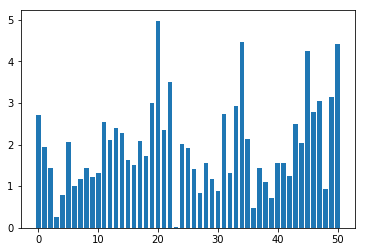

In [334]:
#Simple EDA. Feature Importance
plt.bar(range(len(cb_clf.feature_importances_)), cb_clf.feature_importances_)

# Basic Catboost Data Manipulation

In [335]:
proba_cb = cb_clf.predict_proba(x_test)[:,1]

In [336]:
x1 = np.arange(0, 1.01, 0.01)
y1 = np.arange(0, 1.01, 0.01)
z1 = np.arange(0, 1.01, 0.01)

for i in np.arange(0, 1.01, 0.01):
    y_pred = ((proba_cb) > i).astype(int)
    y1[int(i*100)] = accuracy_score(y_test, y_pred)
    z1[int(i*100)] = f1_score(y_test, y_pred)

In [337]:
max(z1)

0.8684210526315789

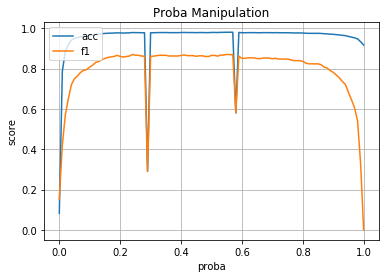

In [257]:
ax = plt.subplot(111)

ax.plot(x1, y1, label='acc')
ax.plot(x1, z1, label='f1')

ax.set(xlabel='proba', ylabel='score', title='Proba Manipulation')
ax.legend(loc='upper left')
ax.grid()

# Grid Search

In [81]:
# load libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt    
from catboost import CatBoostClassifier

In [313]:
depth = [3,1,2,6,4,5,7,8,9,10]
iterations = [1040, 1050, 1060] # [311,313,314]
learning_rate = [0.027, 0.028, 0.029] #[0.0875,0.088,0.0885]
l2_leaf_reg = [3,1,5,10,100]
border_count = [10,11,12,13]
ctr_border_count = [50,5,10,20,100,200]
thread_count = 4

parameters = {'depth': depth,
               'iterations': iterations,
               'learning_rate': learning_rate,
               'l2_leaf_reg ': l2_leaf_reg ,
               'border_count': border_count,
               'ctr_border_count': ctr_border_count,
               'thread_count' : thread_count}
print(parameters)

{'depth': [3, 1, 2, 6, 4, 5, 7, 8, 9, 10], 'iterations': [1040, 1050, 1060], 'learning_rate': [0.027, 0.028, 0.029], 'l2_leaf_reg ': [3, 1, 5, 10, 100], 'border_count': [10, 11, 12, 13], 'ctr_border_count': [50, 5, 10, 20, 100, 200], 'thread_count': 4}


In [314]:
import warnings
warnings.filterwarnings("ignore")

model = CatBoostClassifier()
parameters = {
                'border_count': [11],
                'depth': [8],
                'learning_rate': [0.027, 0.028, 0.029],
                'iterations': [1040, 1050, 1060],
                'thread_count' : [4]
             }

randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, 
                           cv = 2, n_iter = 10, n_jobs=-1, scoring='f1')
randm.fit(x_train, y_train)

# Results from Random Search
print("\n========================================================")
print(" Results from Random Search " )
print("========================================================")    

print("\n The best estimator across ALL searched params:\n",
      randm.best_estimator_)

print("\n The best score across ALL searched params:\n",
      randm.best_score_)

print("\n The best parameters across ALL searched params:\n",
      randm.best_params_)

print("\n ========================================================")

0:	learn: 0.6412707	total: 5.47ms	remaining: 5.74s
1:	learn: 0.5938655	total: 9.78ms	remaining: 5.12s
2:	learn: 0.5526892	total: 14.3ms	remaining: 5s
3:	learn: 0.5131617	total: 18.4ms	remaining: 4.8s
4:	learn: 0.4751051	total: 22.5ms	remaining: 4.71s
5:	learn: 0.4432424	total: 26.8ms	remaining: 4.66s
6:	learn: 0.4149584	total: 31ms	remaining: 4.62s
7:	learn: 0.3866267	total: 35.2ms	remaining: 4.58s
8:	learn: 0.3615194	total: 39.4ms	remaining: 4.55s
9:	learn: 0.3392733	total: 43.7ms	remaining: 4.55s
10:	learn: 0.3194121	total: 48ms	remaining: 4.53s
11:	learn: 0.2996639	total: 52.2ms	remaining: 4.52s
12:	learn: 0.2826224	total: 56.6ms	remaining: 4.51s
13:	learn: 0.2672354	total: 60.9ms	remaining: 4.5s
14:	learn: 0.2542301	total: 65ms	remaining: 4.49s
15:	learn: 0.2410202	total: 69.2ms	remaining: 4.47s
16:	learn: 0.2291106	total: 73.5ms	remaining: 4.47s
17:	learn: 0.2189042	total: 77.8ms	remaining: 4.46s
18:	learn: 0.2103318	total: 81.9ms	remaining: 4.45s
19:	learn: 0.2016926	total: 86.1m

171:	learn: 0.0433966	total: 719ms	remaining: 3.67s
172:	learn: 0.0432419	total: 723ms	remaining: 3.66s
173:	learn: 0.0430360	total: 727ms	remaining: 3.66s
174:	learn: 0.0427952	total: 731ms	remaining: 3.65s
175:	learn: 0.0426724	total: 735ms	remaining: 3.65s
176:	learn: 0.0424550	total: 739ms	remaining: 3.65s
177:	learn: 0.0422963	total: 743ms	remaining: 3.64s
178:	learn: 0.0420965	total: 747ms	remaining: 3.64s
179:	learn: 0.0419809	total: 751ms	remaining: 3.63s
180:	learn: 0.0418585	total: 755ms	remaining: 3.63s
181:	learn: 0.0417472	total: 759ms	remaining: 3.62s
182:	learn: 0.0416020	total: 763ms	remaining: 3.62s
183:	learn: 0.0415158	total: 767ms	remaining: 3.61s
184:	learn: 0.0413366	total: 771ms	remaining: 3.6s
185:	learn: 0.0412337	total: 775ms	remaining: 3.6s
186:	learn: 0.0411167	total: 779ms	remaining: 3.6s
187:	learn: 0.0408994	total: 783ms	remaining: 3.59s
188:	learn: 0.0407236	total: 787ms	remaining: 3.59s
189:	learn: 0.0406445	total: 791ms	remaining: 3.58s
190:	learn: 0.0

347:	learn: 0.0229479	total: 1.43s	remaining: 2.89s
348:	learn: 0.0228976	total: 1.44s	remaining: 2.89s
349:	learn: 0.0228498	total: 1.44s	remaining: 2.88s
350:	learn: 0.0227655	total: 1.45s	remaining: 2.88s
351:	learn: 0.0227223	total: 1.45s	remaining: 2.88s
352:	learn: 0.0225809	total: 1.45s	remaining: 2.87s
353:	learn: 0.0225201	total: 1.46s	remaining: 2.87s
354:	learn: 0.0225159	total: 1.46s	remaining: 2.86s
355:	learn: 0.0224505	total: 1.47s	remaining: 2.86s
356:	learn: 0.0224118	total: 1.47s	remaining: 2.85s
357:	learn: 0.0223323	total: 1.47s	remaining: 2.85s
358:	learn: 0.0222329	total: 1.48s	remaining: 2.84s
359:	learn: 0.0221832	total: 1.48s	remaining: 2.84s
360:	learn: 0.0221343	total: 1.49s	remaining: 2.83s
361:	learn: 0.0220936	total: 1.49s	remaining: 2.83s
362:	learn: 0.0220127	total: 1.49s	remaining: 2.83s
363:	learn: 0.0219711	total: 1.5s	remaining: 2.82s
364:	learn: 0.0219130	total: 1.5s	remaining: 2.82s
365:	learn: 0.0218721	total: 1.5s	remaining: 2.81s
366:	learn: 0.0

525:	learn: 0.0141769	total: 2.15s	remaining: 2.14s
526:	learn: 0.0141111	total: 2.15s	remaining: 2.14s
527:	learn: 0.0140994	total: 2.16s	remaining: 2.13s
528:	learn: 0.0140667	total: 2.16s	remaining: 2.13s
529:	learn: 0.0140411	total: 2.17s	remaining: 2.12s
530:	learn: 0.0140068	total: 2.17s	remaining: 2.12s
531:	learn: 0.0139381	total: 2.17s	remaining: 2.12s
532:	learn: 0.0138699	total: 2.18s	remaining: 2.11s
533:	learn: 0.0138005	total: 2.18s	remaining: 2.11s
534:	learn: 0.0137927	total: 2.19s	remaining: 2.1s
535:	learn: 0.0137350	total: 2.19s	remaining: 2.1s
536:	learn: 0.0136688	total: 2.19s	remaining: 2.1s
537:	learn: 0.0136141	total: 2.2s	remaining: 2.09s
538:	learn: 0.0135805	total: 2.2s	remaining: 2.09s
539:	learn: 0.0135660	total: 2.21s	remaining: 2.08s
540:	learn: 0.0135280	total: 2.21s	remaining: 2.08s
541:	learn: 0.0134953	total: 2.21s	remaining: 2.08s
542:	learn: 0.0134443	total: 2.22s	remaining: 2.07s
543:	learn: 0.0133861	total: 2.22s	remaining: 2.07s
544:	learn: 0.013

702:	learn: 0.0088765	total: 2.87s	remaining: 1.42s
703:	learn: 0.0088547	total: 2.87s	remaining: 1.41s
704:	learn: 0.0088311	total: 2.88s	remaining: 1.41s
705:	learn: 0.0088116	total: 2.88s	remaining: 1.4s
706:	learn: 0.0087871	total: 2.88s	remaining: 1.4s
707:	learn: 0.0087573	total: 2.89s	remaining: 1.4s
708:	learn: 0.0087237	total: 2.89s	remaining: 1.39s
709:	learn: 0.0087036	total: 2.9s	remaining: 1.39s
710:	learn: 0.0086915	total: 2.9s	remaining: 1.38s
711:	learn: 0.0086847	total: 2.9s	remaining: 1.38s
712:	learn: 0.0086681	total: 2.91s	remaining: 1.37s
713:	learn: 0.0086433	total: 2.91s	remaining: 1.37s
714:	learn: 0.0086224	total: 2.92s	remaining: 1.37s
715:	learn: 0.0086081	total: 2.92s	remaining: 1.36s
716:	learn: 0.0085830	total: 2.92s	remaining: 1.36s
717:	learn: 0.0085629	total: 2.93s	remaining: 1.35s
718:	learn: 0.0085561	total: 2.93s	remaining: 1.35s
719:	learn: 0.0085186	total: 2.94s	remaining: 1.35s
720:	learn: 0.0084933	total: 2.94s	remaining: 1.34s
721:	learn: 0.0084

880:	learn: 0.0062962	total: 3.58s	remaining: 688ms
881:	learn: 0.0062894	total: 3.59s	remaining: 684ms
882:	learn: 0.0062798	total: 3.59s	remaining: 680ms
883:	learn: 0.0062618	total: 3.6s	remaining: 676ms
884:	learn: 0.0062498	total: 3.6s	remaining: 672ms
885:	learn: 0.0062341	total: 3.61s	remaining: 668ms
886:	learn: 0.0062207	total: 3.61s	remaining: 663ms
887:	learn: 0.0062152	total: 3.61s	remaining: 659ms
888:	learn: 0.0061966	total: 3.62s	remaining: 655ms
889:	learn: 0.0061893	total: 3.62s	remaining: 651ms
890:	learn: 0.0061817	total: 3.63s	remaining: 647ms
891:	learn: 0.0061748	total: 3.63s	remaining: 643ms
892:	learn: 0.0061665	total: 3.63s	remaining: 639ms
893:	learn: 0.0061622	total: 3.64s	remaining: 635ms
894:	learn: 0.0061484	total: 3.64s	remaining: 631ms
895:	learn: 0.0061353	total: 3.65s	remaining: 627ms
896:	learn: 0.0061214	total: 3.65s	remaining: 623ms
897:	learn: 0.0061123	total: 3.66s	remaining: 619ms
898:	learn: 0.0061028	total: 3.66s	remaining: 615ms
899:	learn: 0.


 Results from Random Search 

 The best estimator across ALL searched params:

 The best score across ALL searched params:
 0.8354760015656902

 The best parameters across ALL searched params:
 {'thread_count': 4, 'learning_rate': 0.028, 'iterations': 1050, 'depth': 8, 'border_count': 11}

